<a href="https://colab.research.google.com/github/ran0707/CNN/blob/main/cnn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHENNAL = 3
EPOCHS = 100

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/camellia_sinensis/training/dataset/tea sickness dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 885 files belonging to 8 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [ ]:
len(dataset)

28

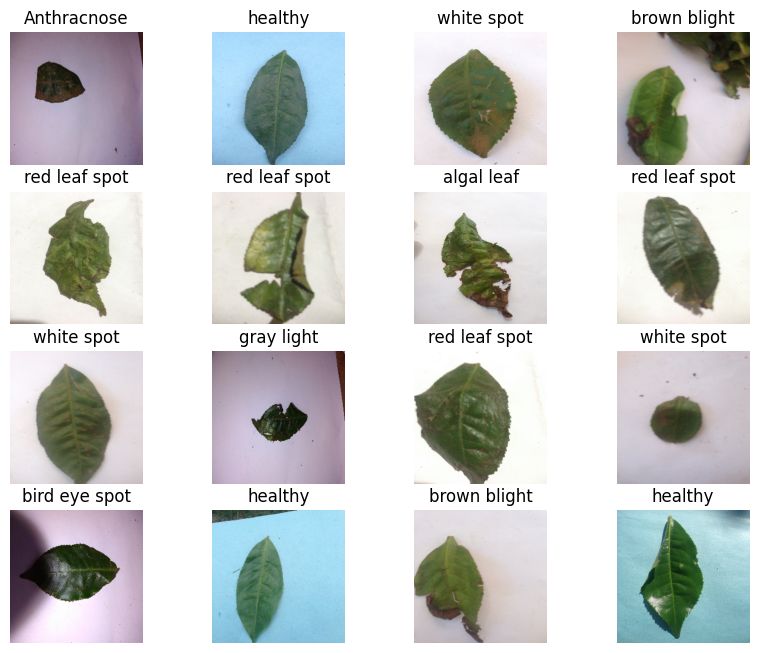

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(16): # for print the 16 images
      ax = plt.subplot(5,4, i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8")) # for show the shuffled image from dataset
      plt.title(class_names[label_batch[i]]) # for show the title of the image
      plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)*train_size

In [ ]:
train_ds = dataset.take(22)
len(train_ds)

In [ ]:
test_ds = dataset.skip(22)
len(test_ds)

In [ ]:
val_size = 0.1
len(dataset)*val_size

In [ ]:
val_ds = test_ds.take(2)
len(val_ds)

In [ ]:
test_ds = test_ds.skip(2)
len(test_ds)

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):

    ds_size = len(ds)
    if shuffle:
      ds = ds.shuffle(shuffle_size, seed = 42)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

22

In [ ]:
len(val_ds)

2

In [ ]:
len(test_ds)

4

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.take(1000)
test_ds = train_ds.skip(1000)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
   layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHENNAL)

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],

)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=2,
    validation_data=val_ds
)

Epoch 1/100
22/22 - 202s - loss: 2.0029 - accuracy: 0.2035 - val_loss: 1.8089 - val_accuracy: 0.3824 - 202s/epoch - 9s/step
Epoch 2/100
22/22 - 158s - loss: 1.6023 - accuracy: 0.3968 - val_loss: 1.3136 - val_accuracy: 0.4747 - 158s/epoch - 7s/step
Epoch 3/100
22/22 - 148s - loss: 1.2273 - accuracy: 0.4416 - val_loss: 1.1873 - val_accuracy: 0.4805 - 148s/epoch - 7s/step
Epoch 4/100
22/22 - 165s - loss: 1.1468 - accuracy: 0.4488 - val_loss: 1.0942 - val_accuracy: 0.4762 - 165s/epoch - 7s/step
Epoch 5/100
22/22 - 158s - loss: 1.0522 - accuracy: 0.5180 - val_loss: 0.9735 - val_accuracy: 0.5786 - 158s/epoch - 7s/step
Epoch 6/100
22/22 - 159s - loss: 1.0395 - accuracy: 0.5267 - val_loss: 1.0910 - val_accuracy: 0.4949 - 159s/epoch - 7s/step
Epoch 7/100
22/22 - 156s - loss: 0.9902 - accuracy: 0.5714 - val_loss: 0.9090 - val_accuracy: 0.6133 - 156s/epoch - 7s/step
Epoch 8/100
22/22 - 149s - loss: 0.9499 - accuracy: 0.5902 - val_loss: 0.9043 - val_accuracy: 0.6147 - 149s/epoch - 7s/step
Epoch 9/

In [ ]:
score = model.evaluate(test_ds)
score

22/22 [==============================] - 32s 1s/step - loss: 0.3370 - accuracy: 0.8557


[0.3369584083557129, 0.8556998372077942]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
acc

[0.20346319675445557,
 0.3968254029750824,
 0.44155845046043396,
 0.44877344369888306,
 0.5180374979972839,
 0.5266955494880676,
 0.5714285969734192,
 0.5901876091957092,
 0.5930736064910889,
 0.630591630935669,
 0.6392496228218079,
 0.6753246784210205,
 0.6190476417541504,
 0.6839826703071594,
 0.6479076743125916,
 0.7128427028656006,
 0.7027416825294495,
 0.7200577259063721,
 0.701298713684082,
 0.7041847109794617,
 0.7373737096786499,
 0.7575757503509521,
 0.7373737096786499,
 0.7417027354240417,
 0.7243867516517639,
 0.7417027354240417,
 0.7575757503509521,
 0.7503607273101807,
 0.7561327815055847,
 0.7590187788009644,
 0.7979797720909119,
 0.7546897530555725,
 0.7590187788009644,
 0.7936508059501648,
 0.8066378235816956,
 0.8051947951316833,
 0.7994228005409241,
 0.7907648086547852,
 0.8095238208770752,
 0.8095238208770752,
 0.7907648086547852,
 0.7864357829093933,
 0.8066378235816956,
 0.7691197395324707,
 0.7849928140640259,
 0.7691197395324707,
 0.7936508059501648,
 0.836940824

In [ ]:
val_acc

[0.3823953866958618,
 0.4747474789619446,
 0.48051947355270386,
 0.4761904776096344,
 0.5786435604095459,
 0.49494948983192444,
 0.6132755875587463,
 0.6147186160087585,
 0.6176046133041382,
 0.6118326187133789,
 0.6580086350440979,
 0.6782106757164001,
 0.6652236580848694,
 0.6839826703071594,
 0.668109655380249,
 0.7142857313156128,
 0.747474730014801,
 0.7128427028656006,
 0.6060606241226196,
 0.7316017150878906,
 0.7113997340202332,
 0.7373737096786499,
 0.7316017150878906,
 0.7359307408332825,
 0.7575757503509521,
 0.7258297204971313,
 0.7330447435379028,
 0.7662337422370911,
 0.6334776282310486,
 0.7590187788009644,
 0.7229437232017517,
 0.6767676472663879,
 0.728715717792511,
 0.7763347625732422,
 0.7561327815055847,
 0.7864357829093933,
 0.7417027354240417,
 0.7878788113594055,
 0.8167388439178467,
 0.8051947951316833,
 0.7936508059501648,
 0.8037518262863159,
 0.7907648086547852,
 0.7445887327194214,
 0.6998556852340698,
 0.8167388439178467,
 0.7936508059501648,
 0.81529581546

Text(0.5, 1.0, 'Training & Validation Loss')

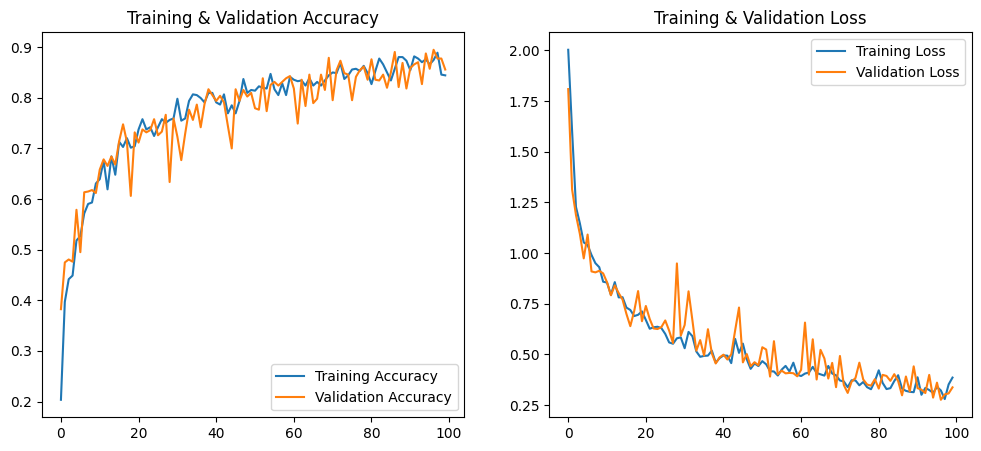

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

first image to predict
first image actual label: white spot
1/1 [==============================] - 2s 2s/step
predicted label: white spot


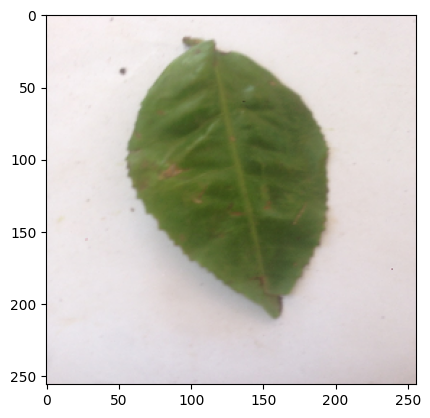

In [ ]:
import numpy as np

for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("first image actual label:", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 59ms/step


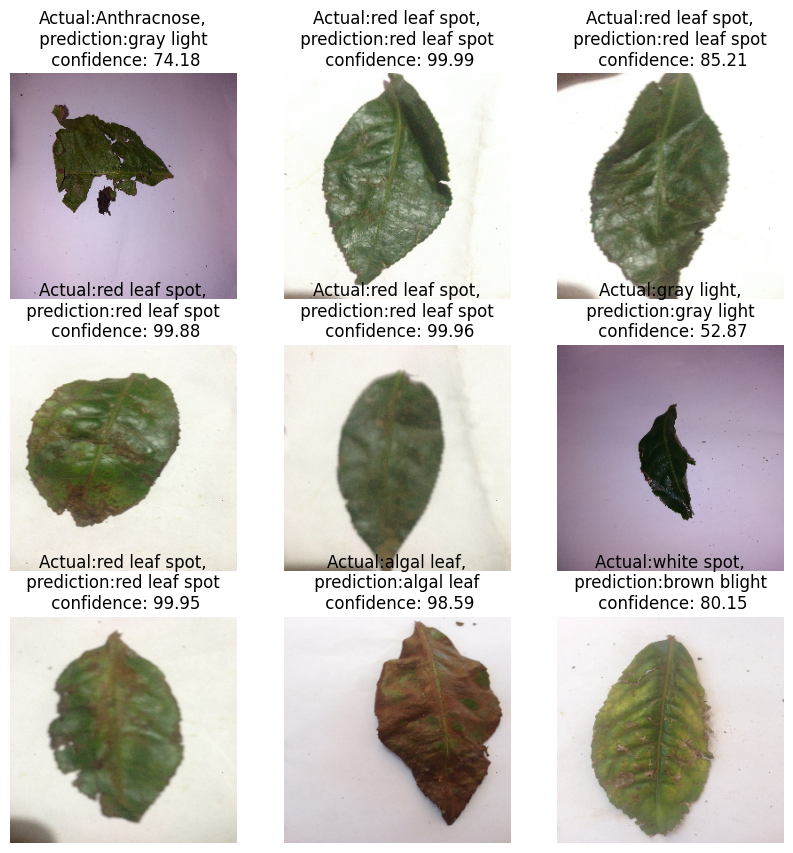

In [ ]:
plt.figure(figsize=(10,10))
for image,label in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, image[i].numpy())
    actual_class = class_names[label[i]]

    plt.title(f"Actual:{actual_class},\n prediction:{predicted_class} \n confidence: {confidence}")
    plt.axis('off')


In [ ]:
import os
model_version= max([int(i) for i in os.listdir("/content/drive/MyDrive/camellia_sinensis/models")+[0]])+1
model.save(f"/content/drive/MyDrive/camellia_sinensis/models/{model_version}")